In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Loading DATASET into Pandas

In [62]:
df=pd.read_csv(r"C:\Users\ameym\Downloads\Bengaluru_House_Data_1.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [63]:
df.shape

(13320, 9)

In [64]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [65]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [66]:
columns_to_drop=["society","availability"]
df1=df.drop(columns_to_drop,axis=1)
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [67]:
df1.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [68]:
df1["bath"]=df1["bath"].fillna(df1["bath"].median())
df1.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

In [69]:
df1['balcony'] = df1['balcony'].fillna(value = df1['balcony'].median())
df1.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [70]:
df2=df1.dropna()
df2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [71]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [72]:
df2["size_BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))
df2

C:\Users\ameym\AppData\Local\Temp\ipykernel_13052\3543096099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["size_BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


,area_type,location,size,total_sqft,bath,balcony,price,size_BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [73]:
df3 = df2.drop(["size"],axis=1)
df3

,area_type,location,total_sqft,bath,balcony,price,size_BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [74]:
df3.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
size_BHK        int64
dtype: object

In [75]:
def convert_sqft_to_number(x):
    tokens=x.split("-")
    if(len(tokens)==2):
        return(float((float(tokens[0])+float(tokens[1]))/2))
    try:
        return float(x)
    except:
        return None

In [76]:
convert_sqft_to_number("2156-2160")

2158.0

In [77]:
df4=df3.copy()

In [78]:
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_number)
df4.head()

,area_type,location,total_sqft,bath,balcony,price,size_BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [79]:
df4.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
size_BHK        int64
dtype: object

In [80]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]/df5["total_sqft"] * 100000
df5

,area_type,location,total_sqft,bath,balcony,price,size_BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [81]:
len(df5["location"].unique())

1304

In [82]:
df['location'] = df5['location'].apply(lambda x: x.strip())

location_freq = df5.groupby('location')["location"].agg("count").sort_values(ascending=False)
location_freq

location
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [83]:
len(location_freq[location_freq < 10])

1051

In [84]:
location_freq_less_than_10 = location_freq[location_freq < 10]
location_freq_less_than_10

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [85]:
len(df5['location'].unique())

1304

In [86]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_freq_less_than_10 else x)
len(df5['location'].unique())

254

# OUTLIER DETECTION

In [87]:
df5[df5['total_sqft']/df5['size_BHK']<300].head()

,area_type,location,total_sqft,bath,balcony,price,size_BHK,price_per_sqft
9,Plot Area,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000


In [88]:
df5.shape

(13303, 8)

In [89]:
df6 = df5[~(df5['total_sqft']/df5['size_BHK']<300)]
df6

,area_type,location,total_sqft,bath,balcony,price,size_BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [90]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [91]:
def remove_based_on_ppsqft(df):
    df_out=pd.DataFrame()
    
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf['price_per_sqft'])
        std=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft'] > (m-(2*std))) & (subdf['price_per_sqft'] < (m+(2*std)))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        
    return (df_out)

In [92]:
df7=remove_based_on_ppsqft(df6)
df7.shape

(11990, 8)

In [93]:
for location,location_df in df7.groupby('location'):
    
    for bhk,bhk_df in location_df.groupby('size_BHK'):
        count=bhk_df.shape[0]
        print(count)

8
5
2
4
4
3
2
5
1
8
7
3
2
1
4
6
6
1
2
3
1
1
1
2
19
9
2
1
1
10
7
1
2
61
70
3
1
1
4
22
17
6
1
1
20
9
4
9
3
2
13
3
2
1
19
37
1
13
9
3
5
20
4
1
2
13
7
15
5
2
4
20
4
5
22
5
1
1
7
5
2
4
10
8
1
1
7
5
1
18
12
5
3
6
4
1
1
2
1
1
15
9
1
1
1
4
8
1
13
10
4
7
10
31
1
2
31
32
1
4
6
1
2
1
4
11
5
1
2
9
3
3
4
10
1
2
3
3
2
6
7
3
5
59
71
11
1
1
6
3
7
17
3
8
3
4
1
10
8
2
4
9
1
1
39
31
3
1
52
32
6
1
5
5
5
10
2
17
17
15
10
6
4
3
11
3
12
36
2
17
11
1
1
1
23
12
15
10
3
6
20
14
8
1
1
7
24
22
2
25
13
1
5
3
2
21
42
27
2
25
9
1
1
1
6
9
1
1
3
2
2
2
1
14
14
12
10
2
1
3
9
2
1
6
4
9
3
1
4
4
2
10
2
1
11
5
1
8
13
12
7
1
19
7
1
5
4
7
6
3
18
7
3
4
1
1
3
4
14
8
3
1
7
10
4
22
183
78
5
4
73
44
5
11
46
27
2
6
18
7
1
5
6
2
5
2
9
7
1
1
2
3
2
1
6
5
1
2
22
16
3
1
4
29
4
7
13
2
1
1
12
8
1
7
3
2
4
2
1
6
7
3
8
4
4
32
13
1
1
2
83
41
11
35
36
6
62
73
35
1
6
15
7
3
6
35
3
1
36
14
3
1
61
77
6
2
1
3
40
33
5
1
1
24
13
1
20
3
1
3
47
17
2
5
34
24
1
1
7
15
7
3
1
1
7
8
1
3
16
21
4
2
3
28
12
5
5
2
1
1
4
6
2
11
9
2
3
11
15
8
2
2
1
3
27
24
7
2
1

In [94]:
def remove_bhk_outliers(df):
    excluded_indices=np.array([])
    
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('size_BHK'):
            bhk_stats[bhk]={
                
                "mean": np.mean(bhk_df['price_per_sqft']),
                "std": np.std(bhk_df['price_per_sqft']),
                "count": bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('size_BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excluded_indices = np.append(excluded_indices, bhk_df[bhk_df["price_per_sqft"]<(stats['mean'])].index.values)
    return(df.drop(excluded_indices, axis="index"))

In [95]:
df8=remove_bhk_outliers(df7)
df8.shape

(8567, 8)

In [96]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,size_BHK,price_per_sqft
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699


Text(0, 0.5, 'Count')

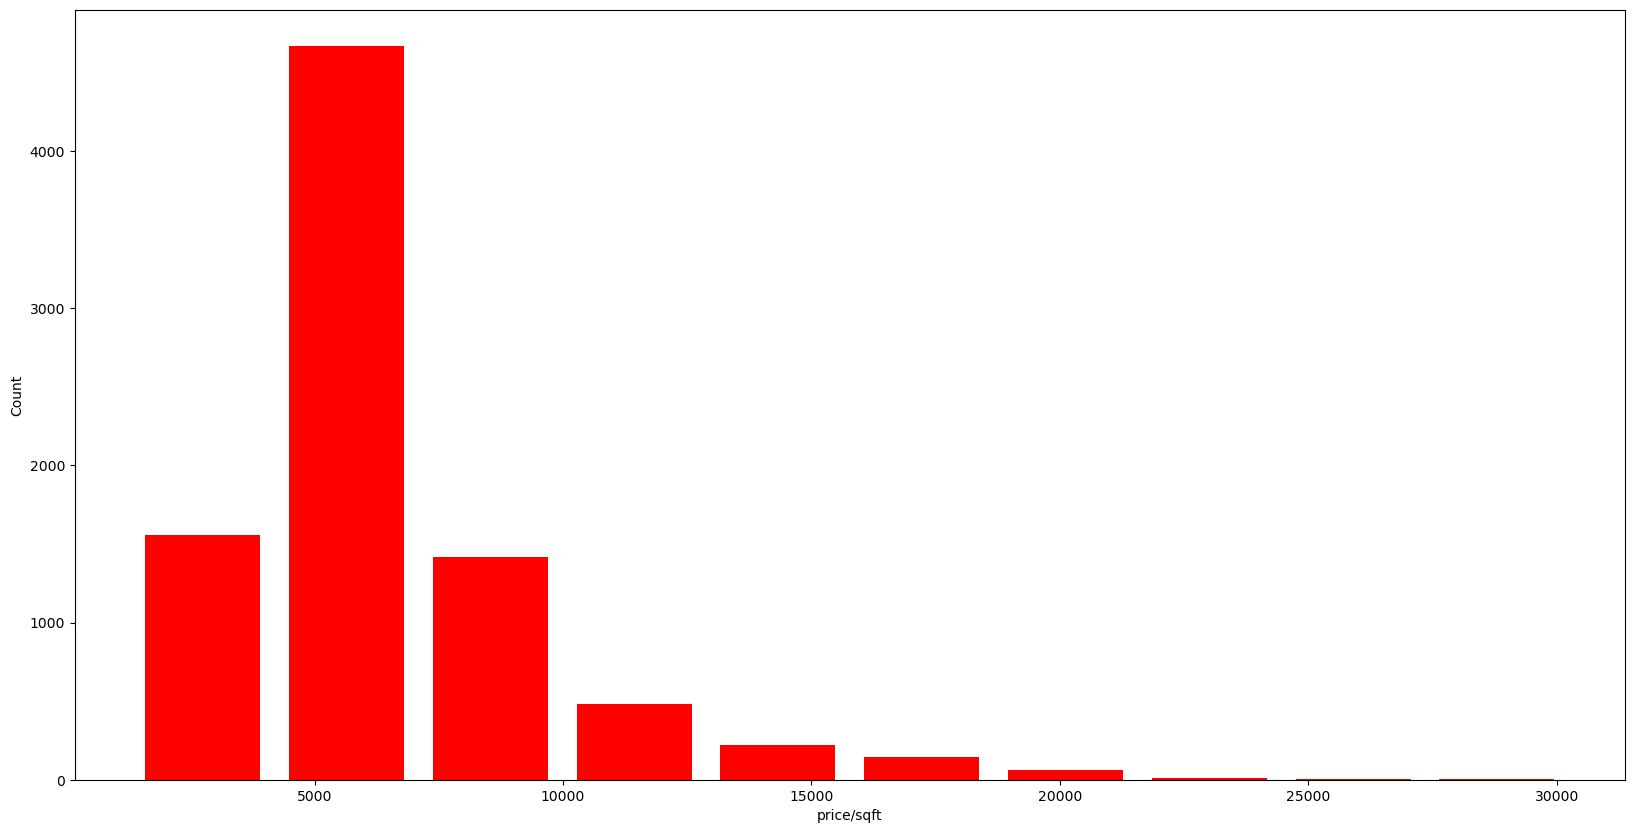

In [97]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8['price_per_sqft'],rwidth=0.8, color = 'r')
plt.xlabel("price/sqft")
plt.ylabel("Count")

In [98]:
df8['bath'].unique()

array([ 2.,  3.,  4.,  5.,  7.,  1.,  8.,  6., 14.,  9., 10., 12., 16.,
       13.])

In [99]:
df8[df8['bath'] > (df8['size_BHK']+2)]

,area_type,location,total_sqft,bath,balcony,price,size_BHK,price_per_sqft
706,Plot Area,BTM 1st Stage,3300.0,14.0,2.0,500.0,9,15151.515152
1945,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6364,Built-up Area,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
8214,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330


In [100]:
df9=df8[df8['bath']<df8['size_BHK']+2]
df9.shape

(8460, 8)

In [103]:
df9['balcony'].unique() # No outliers in Balcony

array([2., 1., 3., 0.])

In [104]:
df10=df9.drop(['price_per_sqft'],axis=1)
df10.head()

,area_type,location,total_sqft,bath,balcony,price,size_BHK
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


# MODEL TRAINING

In [105]:
df10 = pd.get_dummies(data = df10, columns = ["area_type"])
df10.head(5)

,location,total_sqft,bath,balcony,price,size_BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,0,0,0,1
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,0,0,1,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,0,0,0,1
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,0,0,0,1
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,0,0,0,1


In [106]:
dummies= pd.get_dummies(df10['location'])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df11=pd.concat([df10,dummies.drop(['other'],axis=1)],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,size_BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df12=df11.drop(['location'],axis='columns')
df12.head()

,total_sqft,bath,balcony,price,size_BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
x=df12.drop(['price'],axis='columns')
y=df12['price']

In [110]:
x.head()

,total_sqft,bath,balcony,size_BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [112]:
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
lr_reg.score(x_test,y_test)

0.7867457046890196

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.77632391, 0.80079085, 0.7537391 , 0.81272181, 0.80210851])

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def Best_model_using_gridsearchCV(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1,2,3,4,5],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [115]:
Best_model_using_gridsearchCV(x,y)

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(wi

,model,best_score,best_params
0,linear_regression,0.789137,{'normalize': False}
1,lasso,0.711665,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.683033,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [116]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'size_BHK', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', ' Devarachikkanahalli',
       '1st Block Jayanagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=261)

In [117]:
x.head()

,total_sqft,bath,balcony,size_BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
a = "Built-up Area"
a = "area_type_" + a
a

'area_type_Built-up  Area'

In [129]:
def predict_price_function(area_type, location, sqft, bath, balcony, bhk):
    loc_index=np.where(x.columns==location)[0][0]
    area_type = "area_type_" + area_type 
    area_index = np.where(x.columns == area_type)[0][0]
    
    user_x=np.zeros(len(x.columns))
    user_x[0]=sqft
    user_x[1]=bath
    user_x[2]=balcony
    user_x[3]=bhk
    
    if (loc_index>=0):
        user_x[loc_index]=1
        
    if (area_index >= 0):
        user_x[area_index] = 1
    
    return(lr_reg.predict([user_x])[0])

In [130]:
predict_price_function('Built-up  Area','1st Phase JP Nagar',1000, 2, 2, 2)

D:\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.65338134765625

In [131]:
predict_price_function('Super built-up  Area','1st Phase JP Nagar',1000, 3, 2, 3)

D:\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.68359375

In [132]:
predict_price_function('Super built-up  Area','Indira Nagar',1000, 2, 2, 2)

D:\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


190.3289794921875

In [138]:
predict_price_function('Super built-up  Area','Indira Nagar',1200, 2, 2, 1)

D:\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


213.94561767578125

In [127]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_reg,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))